## Logistic Regression on Olivetti faces dataset

**Information on the dataset can be obtained at <br> ** https://scikit-learn.org/0.19/modules/generated/sklearn.datasets.fetch_olivetti_faces.html#sklearn.datasets.fetch_olivetti_faces

In [93]:
#import libraries and fetch data
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.datasets import fetch_olivetti_faces

### Data Exploration

- Variable data holds 400 examples of the image data
- Variable target holds the class each example belongs to.
- The target classes are one hot encoded
- A sample image is visualized
- Data is split into train and test sets in ratio 90:10

In [94]:
data = fetch_olivetti_faces(shuffle = True, random_state = 5)
target = data.target
data = data.data

In [95]:
classes = 40
no_of_examples = data.shape[0]
no_of_examples

400

In [96]:
Y_hot = np.zeros((no_of_examples,classes), dtype = "float32")
Y_hot[np.arange(no_of_examples), target]  = 1

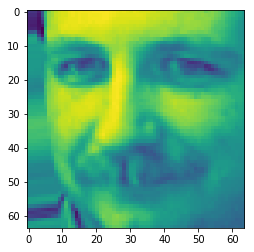

In [97]:
plt.imshow(data[34].reshape(64,64))

In [98]:
m_train = int(0.9*no_of_examples) #number of training examples
X_train = data[:m_train]
X_test  = data[m_train:]
Y_train = Y_hot[:m_train]
Y_test  = Y_hot[m_train:]

## Model Training

- The matrix product of weights and the input data is fed into a softmax function
- The cost function is the cross enthropy loss 
- A batch size of 10 is set for this model
- The chosen learning rate is 0.001
- The chosen optimizer is the AdamOptimizer

In [99]:
lr = 0.001
epochs = 50
bs = 10
losses = []
train_acces = []
test_acces = []

X = tf.placeholder(tf.float32,[None, 4096])
Y = tf.placeholder(tf.float32,[None, 40])

W = tf.Variable(np.zeros((4096,40), dtype = "float32"))
b = tf.Variable(np.zeros(40), dtype = "float32")

model = tf.nn.softmax(tf.matmul(X,W) + b)
loss = -tf.reduce_mean(Y*tf.log(model))
optimizer = tf.train.AdamOptimizer(lr).minimize(loss)
init = tf.global_variables_initializer()

accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(model,1),tf.argmax(Y,1)),dtype = tf.float32))

In [100]:
with tf.Session() as s:
  s.run(init)
  for epoch in range(epochs):
    cost = 0
    X_train,Y_train = shuffle(X_train,Y_train,random_state=5)
    no_of_bs = int(X_train.shape[0]/bs)
    
    for i in range(no_of_bs):
      bx = X_train[i*bs:(i+1)*bs] 
      by = Y_train[i*bs:(i+1)*bs]
      _,l = s.run([optimizer, loss], feed_dict = { X:bx, Y:by})
      cost += l/no_of_bs
    if epoch % 10 == 9:
        print("cost for epoch ", epoch+1 , "is ", cost)
    losses.append(cost)
    train_acc = s.run(accuracy , feed_dict = {X:X_train,Y:Y_train})
    test_acc = s.run(accuracy , feed_dict = {X:X_test,Y:Y_test})
    train_acces.append(train_acc)
    test_acces.append(test_acc)    

  print("training accuracy: ", train_acc)
  print("test accuracy: ", test_acc)

cost for epoch  10 is  0.024141143490042948
cost for epoch  20 is  0.0075949449803576685
cost for epoch  30 is  0.005238523148970369
cost for epoch  40 is  0.0014832103641108714
cost for epoch  50 is  0.000998747476033815
training accuracy:  1.0
test accuracy:  0.875


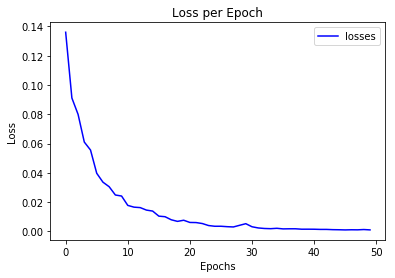

In [101]:
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss per Epoch")
plt.plot(losses,"b-", label = "losses")
plt.legend()

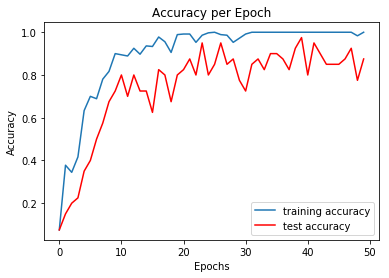

In [102]:
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy per Epoch")
plt.plot(train_acces, label = "training accuracy")
plt.plot(test_acces,"r-", label = "test accuracy")
plt.legend()
plt.show()